# Assignment 18 - Portfólio Individual ML Classiﬁcação - Felipe Silva - RID 2031


# Informações Datset

- age: Idade (Anos)
- sex: Sexo (1 = Masc e 0 = Fem)
- cp: Nível de dor ( 1 a 4 )
- trestbps: Pressão sanguínea em Repouso
- chol: colesterol em mg/dl:
- fbs: Fasting Blood Sugar (Teste diabético) > 120 mg/dl
- restecg: Eletrocardiogramas em repouso (0,1 ou 2)
- thalach: Ritmo cardíaco
- exang: Exercício físico que gerou Angina
- oldpeak: Depressão de ST induzida por exercício em relação ao
repouso
- slope: Tipo de inclinação do segmento ST de pico do exercício
- ca: número de vasos sanguínios ressaltados (coloridos por
ﬂuoroscopia)
- thal: Talassemia -> 3 = normal; 6 = ﬁxed defect; 7 = reversable
defect

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import sys
import warnings
import fbprophet
from google.colab                  import drive
from scipy                         import stats
from sklearn.metrics               import r2_score, mean_absolute_error, mean_squared_error
from sklearn                       import metrics
from sklearn.model_selection       import train_test_split
from sklearn.preprocessing         import MinMaxScaler
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.metrics               import accuracy_score
from sklearn.linear_model          import LogisticRegression
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.ensemble              import RandomForestClassifier
from sklearn.naive_bayes           import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.svm                   import SVC
from sklearn.neural_network        import MLPClassifier
from sklearn.metrics               import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics               import classification_report
from sklearn.metrics               import plot_confusion_matrix
from sklearn.metrics               import plot_roc_curve
from sklearn.model_selection       import GridSearchCV
%matplotlib inline

In [2]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
link  = '/content/gdrive/MyDrive/Colab Notebooks/Slot6 - Deliverable/heart.csv'
df    = pd.read_csv(link)
df_save = df.copy()

In [4]:
df.shape

(303, 14)

In [5]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
77   1    0   125       304   0    0        162      1      0.0      2      3   2     0         1
51   0    2   130       256   0    0        149      0      0.5      2      0   2     1         1
              140       308   0    0        142      0      1.5      2      1   2     1         1
     1    0   140       261   0    0        186      1      0.0      2      0   2     1         1
                                                                                               ..
59   1    0   138       271   0    0        182      0      0.0      2      0   2     1         1
              140       177   0    1        162      1      0.0      2      1   3     0         1
              164       176   1    0        90       0      1.0      1      2   1     0         1
              170       3

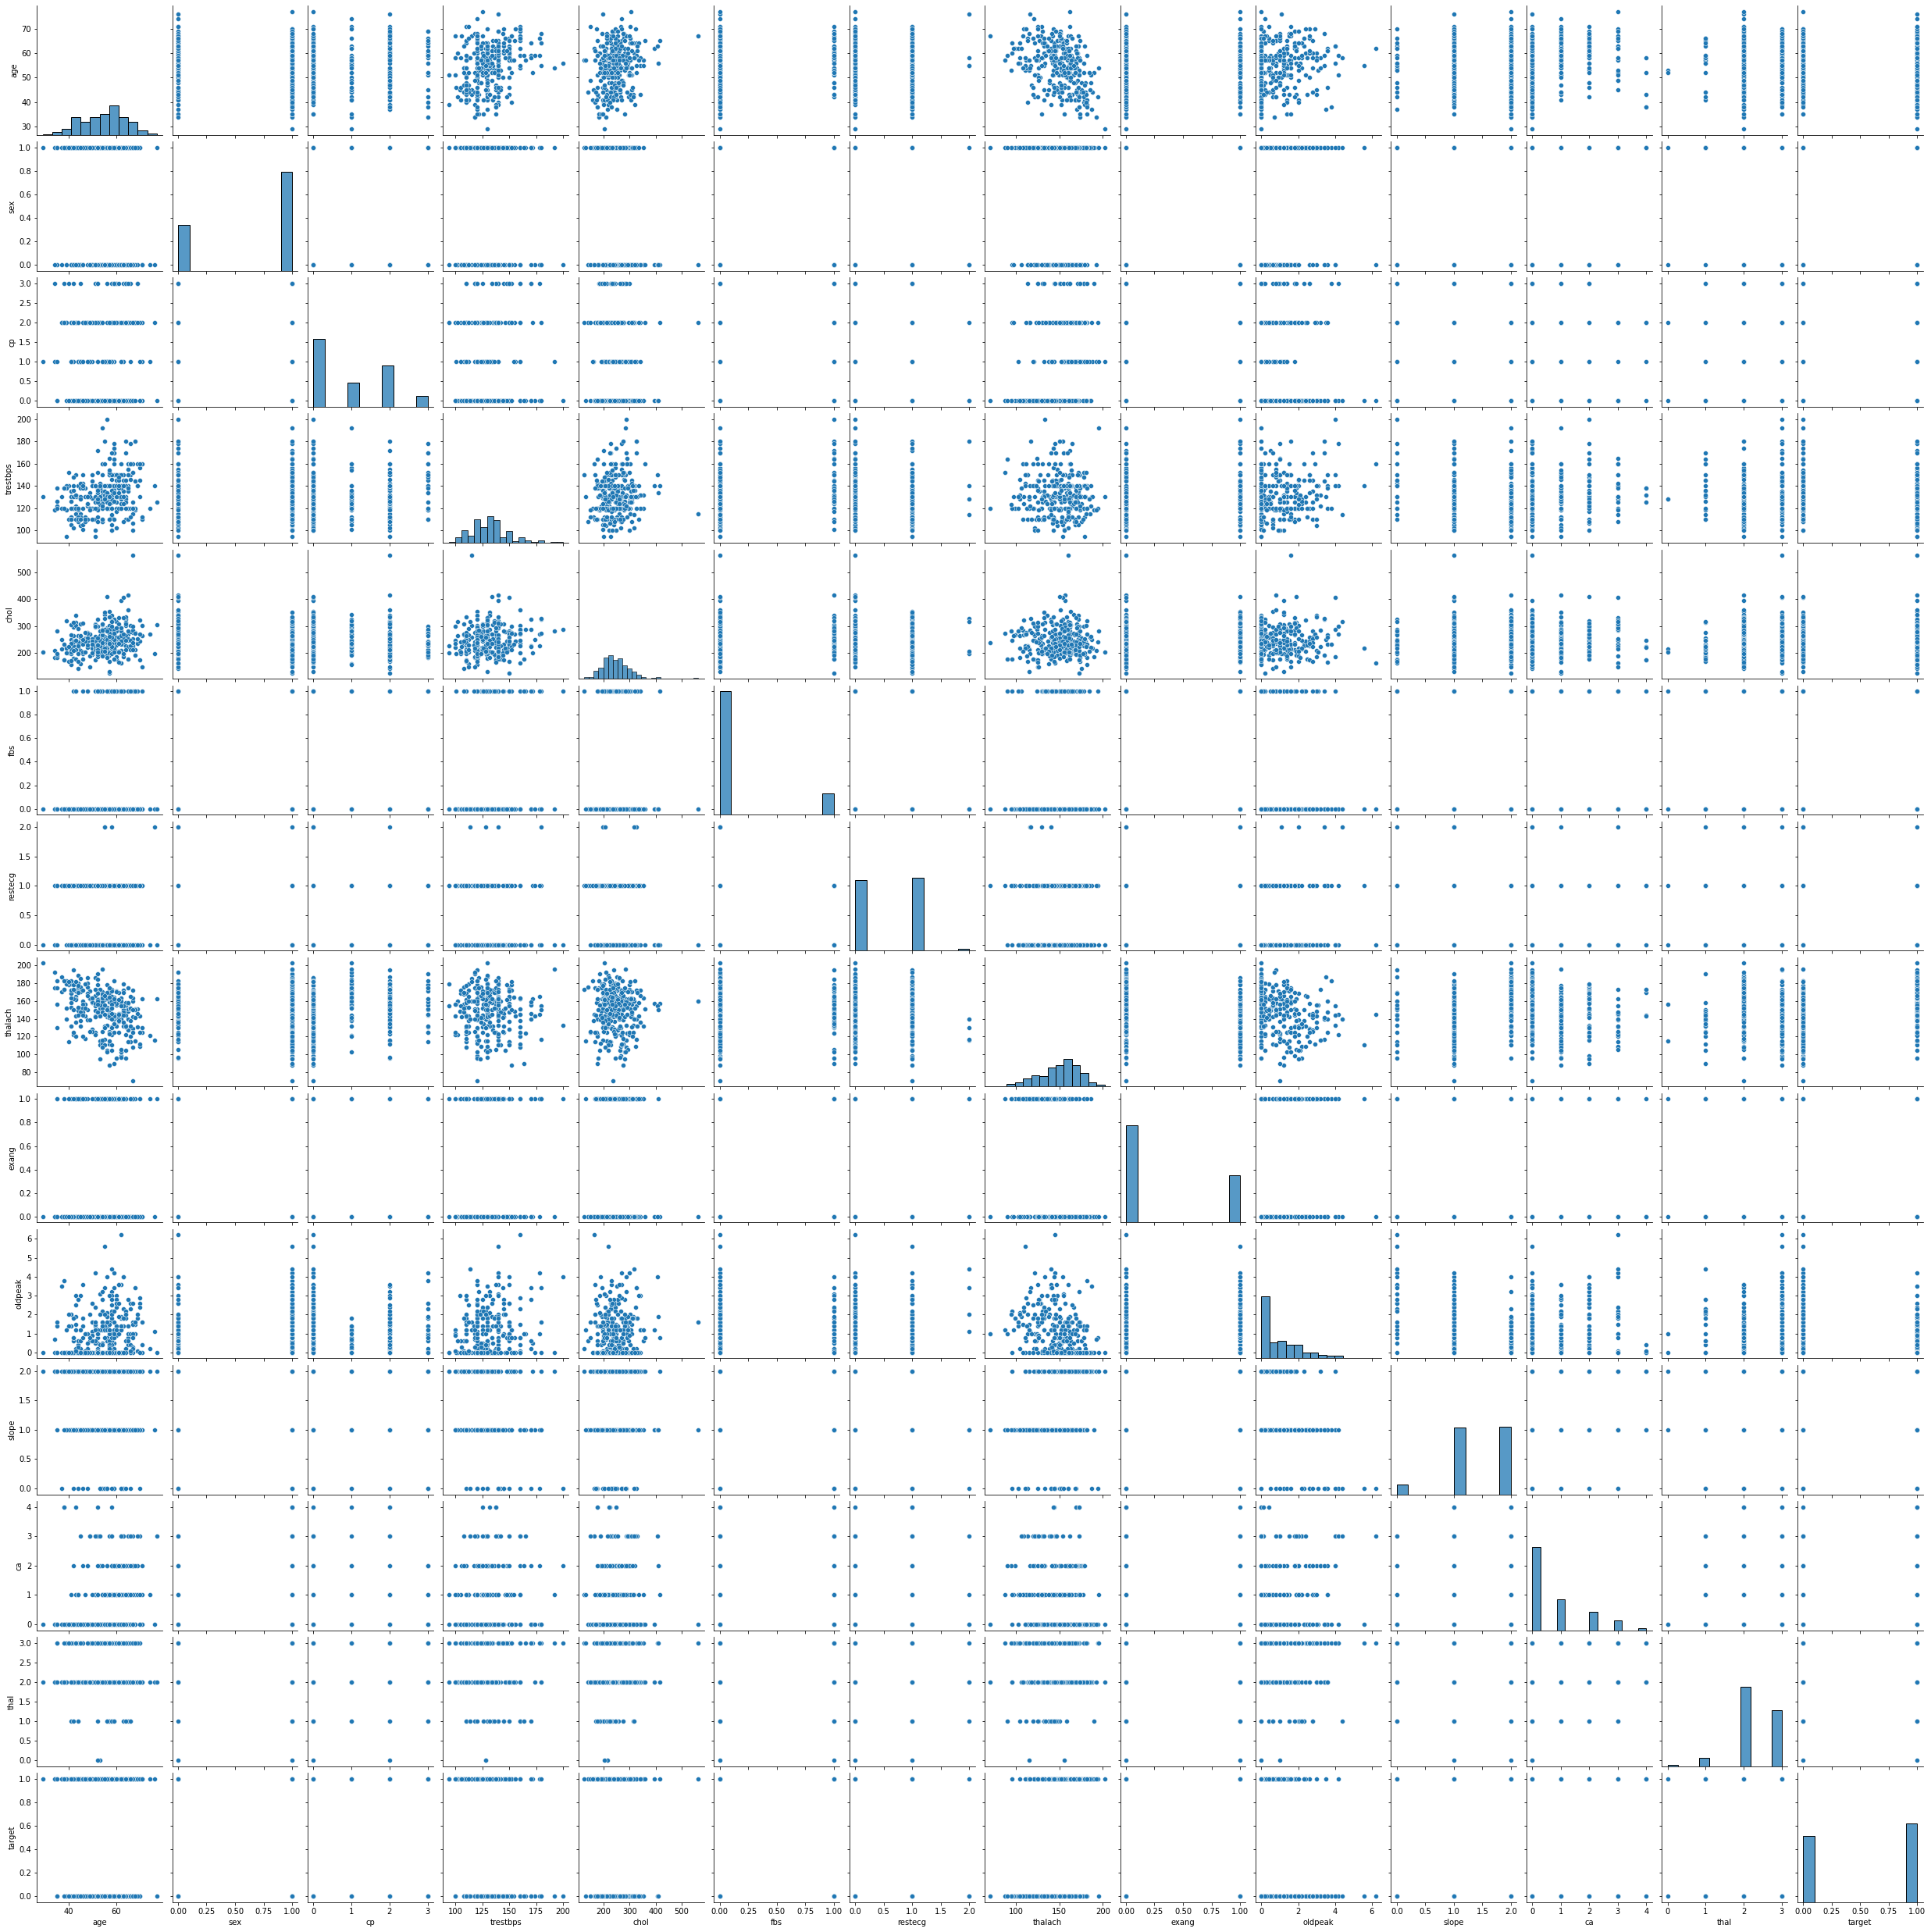

In [7]:
sns.pairplot(df)

In [8]:
corrMatPd = df.corr()
corrMatPd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



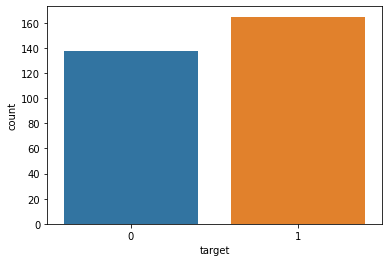

In [12]:
sns.countplot(df['target'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



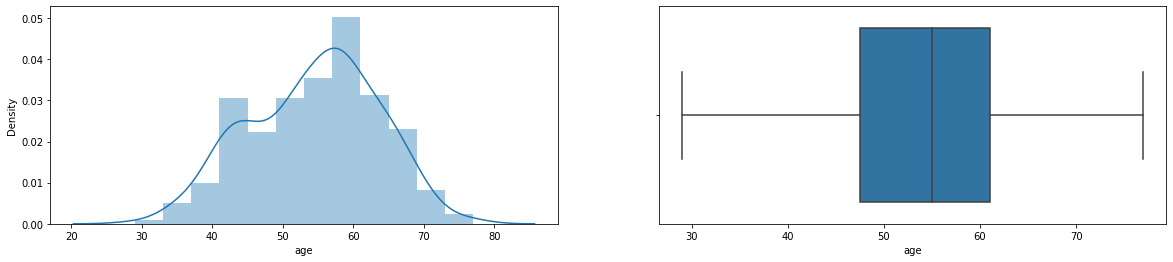

In [13]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['age'])
f.add_subplot(1,2,2)
sns.boxplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



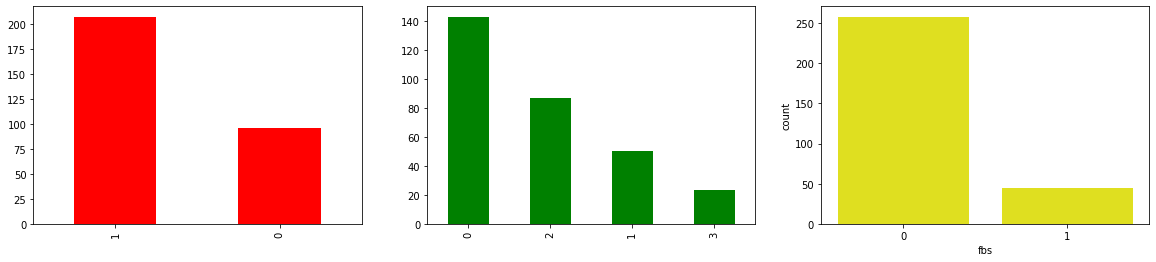

In [14]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,3,1)
df['sex'].value_counts().plot(kind='bar', color='red')
f.add_subplot(1,3,2)
df['cp'].value_counts().plot(kind='bar', color='green')
f.add_subplot(1,3,3)
sns.countplot(df['fbs'], color='yellow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



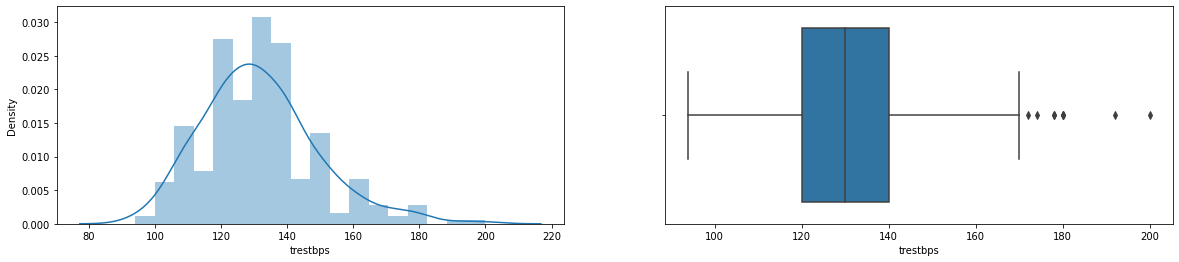

In [15]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['trestbps'])
f.add_subplot(1,2,2)
sns.boxplot(df['trestbps'])

# Preparando os Dados para Aplicação de ML de Classificação

In [16]:
X = df.drop(columns=["target"])
Y = df["target"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (242, 13)
Shape y_train: (242,)
Shape X_test: (61, 13)
Shape y_test: (61,)


In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [19]:
f1score_list    = []
accuracy_list   = []
recall_list     = []
precission_list = []
clf_list        = []

# Classificador KNN

In [20]:
scores_list = []
K_neighbors = range(1,20)

for k in K_neighbors:

  knn =  KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores_list.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Acurácia')

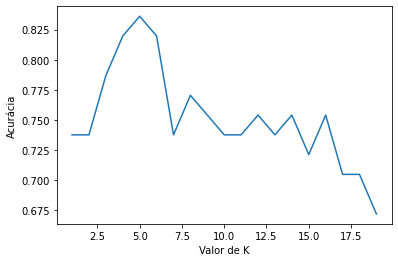

In [21]:
plt.plot(K_neighbors, scores_list)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")

In [22]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('KNeighborsClassifier')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 83.60655737704919%
Precision: 81.81818181818183%
Recall: 87.09677419354838%
F1: 84.375%


              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.82      0.87      0.84        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



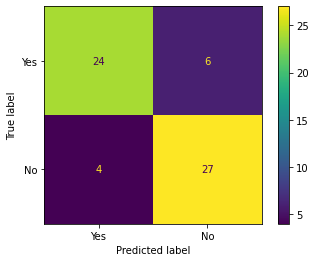

In [23]:
print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

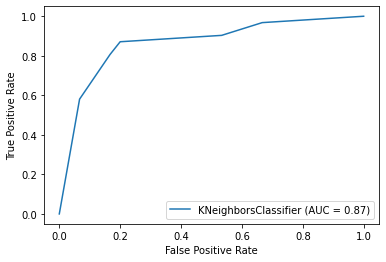

In [24]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

# Classificador Regressão Logística

In [25]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('LogisticRegression')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 73.77049180327869%
Precision: 69.23076923076923%
Recall: 87.09677419354838%
F1: 77.14285714285715%


              precision    recall  f1-score   support

           0       0.82      0.60      0.69        30
           1       0.69      0.87      0.77        31

    accuracy                           0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



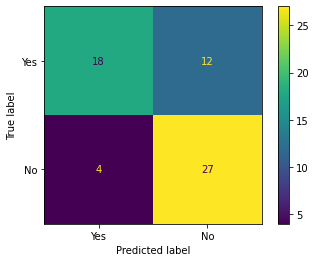

In [26]:
print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

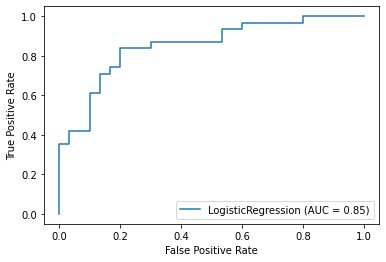

In [27]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

# Classificador Decision Tree

In [28]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('DecisionTreeClassifier')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 68.85245901639344%
Precision: 66.66666666666666%
Recall: 77.41935483870968%
F1: 71.64179104477611%


              precision    recall  f1-score   support

           0       0.72      0.60      0.65        30
           1       0.67      0.77      0.72        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



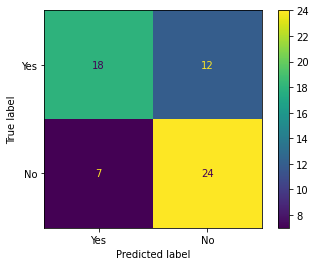

In [29]:
print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

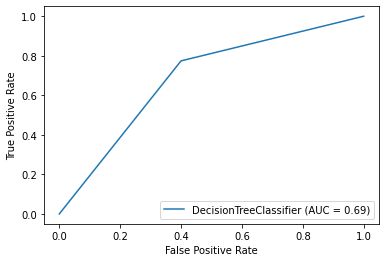

In [30]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

# Classificador Random Forest

In [31]:
clf = RandomForestClassifier(criterion='entropy', n_estimators=150) 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('RandomForestClassifier')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 70.49180327868852%
Precision: 65.85365853658537%
Recall: 87.09677419354838%
F1: 75.0%


              precision    recall  f1-score   support

           0       0.80      0.53      0.64        30
           1       0.66      0.87      0.75        31

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.70        61
weighted avg       0.73      0.70      0.70        61



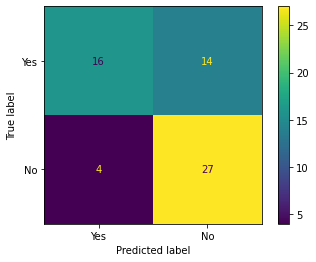

In [32]:
print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

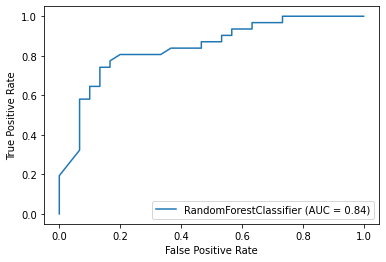

In [33]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

# Classificador Naive Bayes

In [34]:
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('GaussianNB')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 78.68852459016394%
Precision: 76.47058823529412%
Recall: 83.87096774193549%
F1: 80.0%


              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.76      0.84      0.80        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



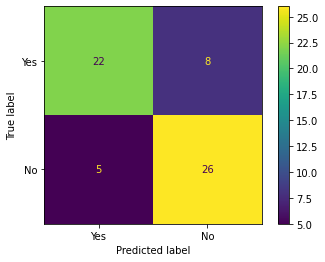

In [35]:
print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

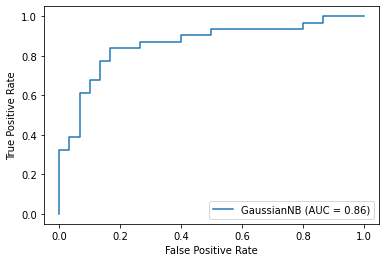

In [36]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

In [37]:
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('MultinomialNB')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 70.49180327868852%
Precision: 65.85365853658537%
Recall: 87.09677419354838%
F1: 75.0%


              precision    recall  f1-score   support

           0       0.80      0.53      0.64        30
           1       0.66      0.87      0.75        31

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.70        61
weighted avg       0.73      0.70      0.70        61



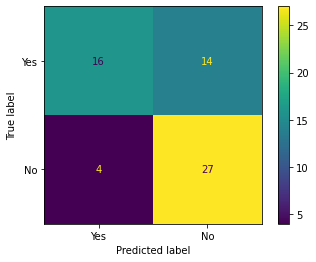

In [38]:
print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

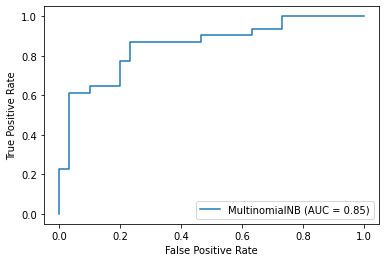

In [39]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

In [40]:
clf = ComplementNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('ComplementNB')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 75.40983606557377%
Precision: 71.05263157894737%
Recall: 87.09677419354838%
F1: 78.26086956521739%


              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.71      0.87      0.78        31

    accuracy                           0.75        61
   macro avg       0.77      0.75      0.75        61
weighted avg       0.77      0.75      0.75        61



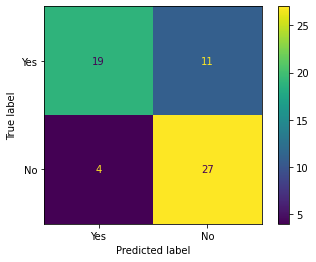

In [41]:
print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

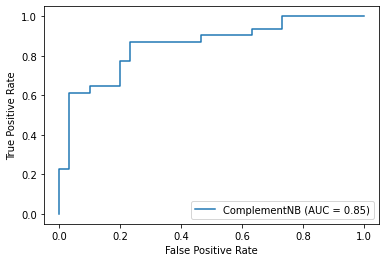

In [42]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

In [43]:
clf = BernoulliNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('BernoulliNB')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 77.04918032786885%
Precision: 71.7948717948718%
Recall: 90.32258064516128%
F1: 80.0%


              precision    recall  f1-score   support

           0       0.86      0.63      0.73        30
           1       0.72      0.90      0.80        31

    accuracy                           0.77        61
   macro avg       0.79      0.77      0.77        61
weighted avg       0.79      0.77      0.77        61



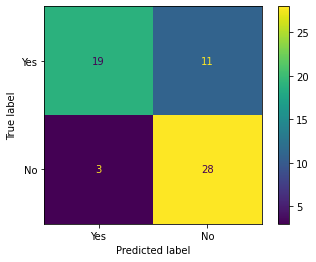

In [44]:
print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

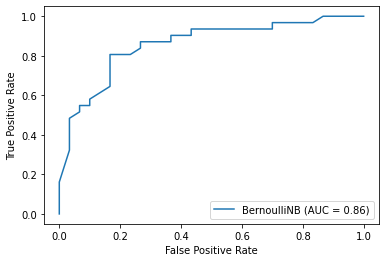

In [45]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

# Classificador SVM

In [46]:
clf = SVC(kernel='poly')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('SVM')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 73.77049180327869%
Precision: 70.27027027027027%
Recall: 83.87096774193549%
F1: 76.47058823529412%


              precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.70      0.84      0.76        31

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



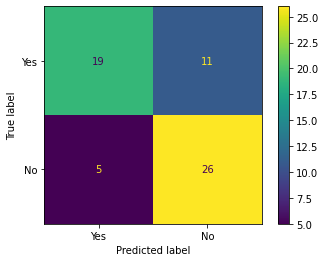

In [47]:
print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

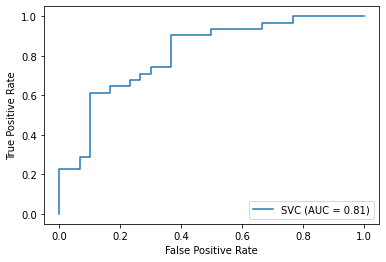

In [48]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

# Classificador MLP

In [49]:
clf = MLPClassifier(hidden_layer_sizes=(100, 50, 20),activation='relu')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('MLPClassifier')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 75.40983606557377%
Precision: 73.52941176470588%
Recall: 80.64516129032258%
F1: 76.92307692307693%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



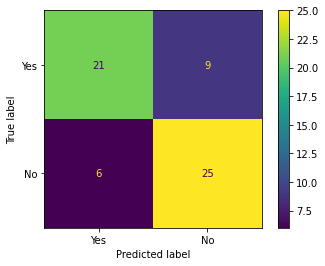

In [50]:
print(classification_report(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

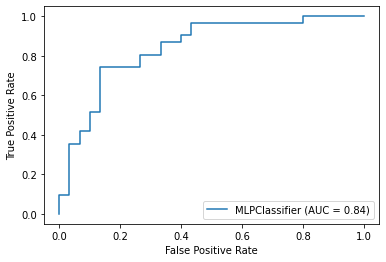

In [51]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

# Avaliando Métricas

In [52]:
df_metricas = pd.DataFrame({'Classificador': clf_list, 'F1-Score': f1score_list, 'Accuracy': accuracy_list, 'Recall': recall_list, 'Precission': precission_list})

In [53]:
df_metricas.sort_values(by='F1-Score', ascending=False)

,Classificador,F1-Score,Accuracy,Recall,Precission
0,KNeighborsClassifier,83.606557,81.818182,87.096774,84.375000
4,GaussianNB,78.688525,76.470588,83.870968,80.000000
7,BernoulliNB,77.049180,71.794872,90.322581,80.000000
6,ComplementNB,75.409836,71.052632,87.096774,78.260870
9,MLPClassifier,75.409836,73.529412,80.645161,76.923077
1,LogisticRegression,73.770492,69.230769,87.096774,77.142857
8,SVM,73.770492,70.270270,83.870968,76.470588
3,RandomForestClassifier,70.491803,65.853659,87.096774,75.000000
5,MultinomialNB,70.491803,65.853659,87.096774,75.000000
2,DecisionTreeClassifier,68.852459,66.666667,77.419355,71.641791


# Tunning Modelo

In [54]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,Y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 7


# Redução de Dimensionalidade

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


In [56]:
X = df.drop(columns=["target"])
Y = df["target"]
X_PCA = pca.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, Y, test_size=0.2, random_state=7)
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (242, 2)
Shape y_train: (242,)
Shape X_test: (61, 2)
Shape y_test: (61,)


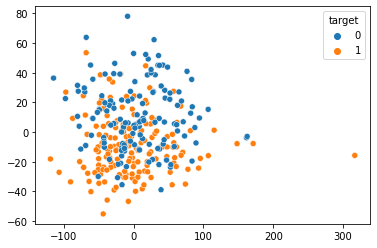

In [58]:
sns.scatterplot(x=X_PCA[:,0], y=X_PCA[:,1], hue=Y)

In [59]:
f1score_list    = []
accuracy_list   = []
recall_list     = []
precission_list = []
clf_list        = []

## Classificador KNN

Text(0, 0.5, 'Acurácia')

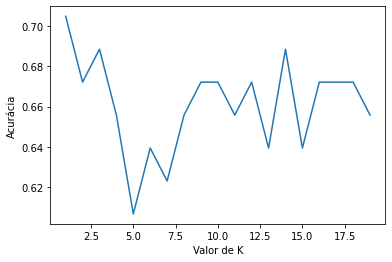

In [60]:
K_neighbors = range(1,20)
scores_list = []

for k in K_neighbors:

  knn =  KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores_list.append(accuracy_score(y_test, y_pred))

plt.plot(K_neighbors, scores_list)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")

In [61]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('KNeighborsClassifier')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 70.49180327868852%
Precision: 69.6969696969697%
Recall: 74.19354838709677%
F1: 71.875%


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        30
           1       0.70      0.74      0.72        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



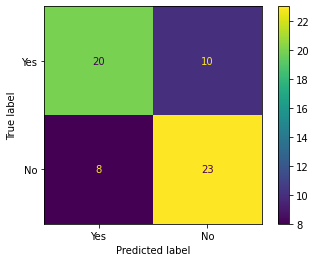

In [63]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

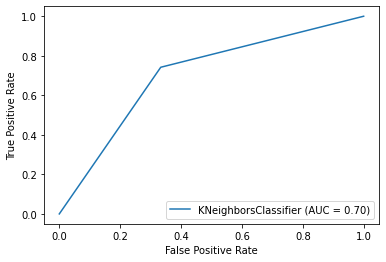

In [64]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

## Classificador SVM com Kernel Linear

In [65]:
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('SVM Linear')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 67.21311475409836%
Precision: 62.7906976744186%
Recall: 87.09677419354838%
F1: 72.97297297297297%


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.47      0.58        30
           1       0.63      0.87      0.73        31

    accuracy                           0.67        61
   macro avg       0.70      0.67      0.66        61
weighted avg       0.70      0.67      0.66        61



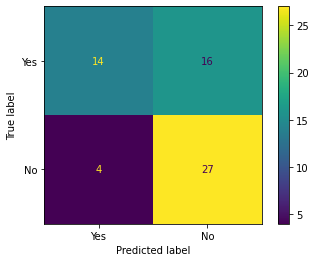

In [67]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

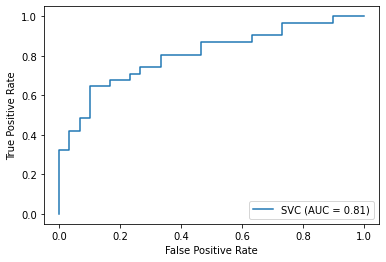

In [68]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

## Classificador SVM com Kernel Polinomial

In [69]:
clf = SVC(kernel='poly')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('SVM Polinomial')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 60.65573770491803%
Precision: 56.60377358490566%
Recall: 96.7741935483871%
F1: 71.42857142857144%


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.23      0.37        30
           1       0.57      0.97      0.71        31

    accuracy                           0.61        61
   macro avg       0.72      0.60      0.54        61
weighted avg       0.72      0.61      0.54        61



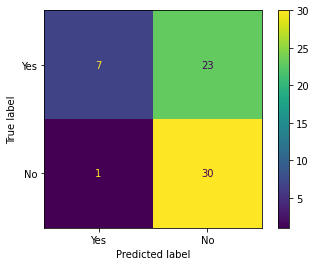

In [71]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

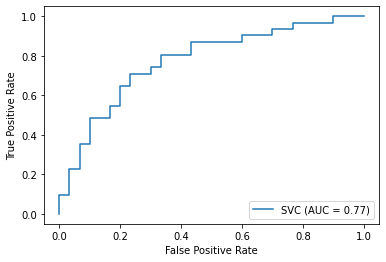

In [72]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

## Classificador MLP

In [73]:
clf = MLPClassifier(hidden_layer_sizes=(100, 50, 20),activation='relu')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)*100
recall    = recall_score(y_test, y_pred)*100
f1score   = f1_score(y_test, y_pred)*100
f1score_list.append(accuracy)
accuracy_list.append(precision)
recall_list.append(recall)
precission_list.append(f1score)
clf_list.append('MLPClassifier')
print(f"Acccuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1: {f1score}%")

Acccuracy: 62.295081967213115%
Precision: 58.69565217391305%
Recall: 87.09677419354838%
F1: 70.12987012987013%


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.37      0.49        30
           1       0.59      0.87      0.70        31

    accuracy                           0.62        61
   macro avg       0.66      0.62      0.60        61
weighted avg       0.66      0.62      0.60        61



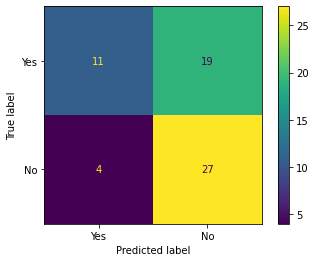

In [75]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=["Yes", "No"], values_format='d')
plt.grid(False)
plt.show()

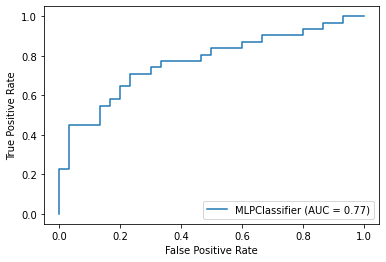

In [76]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

## Avaliação de Métricas

In [77]:
df_metricas = pd.DataFrame({'Classificador': clf_list, 'F1-Score': f1score_list, 'Accuracy': accuracy_list, 'Recall': recall_list, 'Precission': precission_list})

In [78]:
df_metricas.sort_values(by='F1-Score', ascending=False)

,Classificador,F1-Score,Accuracy,Recall,Precission
0,KNeighborsClassifier,70.491803,69.696970,74.193548,71.875000
1,SVM Linear,67.213115,62.790698,87.096774,72.972973
3,MLPClassifier,62.295082,58.695652,87.096774,70.129870
2,SVM Polinomial,60.655738,56.603774,96.774194,71.428571
